<a href="https://colab.research.google.com/github/jrdn-sentosa/Group-13/blob/main/Group_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Import and clean the dataframe
!git clone https://github.com/jrdn-sentosa/Group-13
%cd Group-13
df = pd.read_csv('DPIC_Execution_dataset.csv')
df['Region'] = df['Region'].str.strip().str.title()
df['State'] = df['State'].str.strip().str.title()
df = df[df['State'] != 'Federal']

# Get metrics for visualization
region_counts = df['Region'].value_counts()
state_counts = df['State'].value_counts()
region_counts_texas_removed = df[(df['State'] != 'Texas')]['Region'].value_counts()
state_counts_texas_removed = df[(df['State'] != 'Texas')]['State'].value_counts()
south_counts = df[df['Region'] == 'South']['State'].value_counts()
south_counts_texas_removed = df[(df['Region'] == 'South') & (df['State'] != 'Texas')]['State'].value_counts()
midwest_counts = df[df['Region'] == 'Midwest']['State'].value_counts()
west_counts = df[df['Region'] == 'West']['State'].value_counts()
northeast_counts = df[df['Region'] == 'Northeast']['State'].value_counts()

df.head(5)

Cloning into 'Group-13'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 920.84 KiB | 8.15 MiB/s, done.
Resolving deltas: 100% (10/10), done.
/content/Group-13/Group-13/Group-13/Group-13/Group-13/Group-13/Group-13/Group-13/Group-13/Group-13/Group-13/Group-13/Group-13/Group-13/Group-13/Group-13/Group-13/Group-13/Group-13


,Execution Volunteer,Number of Victims,Juvenile,First Name,Last Name,Middle Name(s),Suffix,Race,Sex,Region,...,Number of Asian Male Victims,Number of Native American Male Victims,Number of Other Race Male Victims,Number of White Female Victims,Number of Black Female Victims,Number of Latino Female Victims,Number of Asian Female Victims,Number of American Indian or Alaska Native Female Victims,Number of Other Race Female Victims,Victim(s) Race(s)
0,yes,1,no,Gary,Gilmore,Mark,NaN,White,Male,West,...,0,0,0,0,0,0,0,0,0,White
1,no,1,no,John,Spenkelink,NaN,NaN,White,Male,South,...,0,0,0,0,0,0,0,0,0,White
2,yes,1,no,Jesse,Bishop,NaN,NaN,White,Male,West,...,0,0,0,0,0,0,0,0,0,White
3,yes,4,no,Steven,Judy,NaN,NaN,White,Male,Midwest,...,0,0,0,2,0,0,0,0,0,White
4,yes,1,no,Frank,Coppola,NaN,NaN,White,Male,South,...,0,0,0,0,0,0,0,0,0,White


In [ ]:
print(df.info())`

<class 'pandas.core.frame.DataFrame'>
Index: 1545 entries, 0 to 1560
Data columns (total 27 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Execution Volunteer                                        1545 non-null   object
 1   Number of Victims                                          1545 non-null   int64 
 2   Juvenile                                                   1545 non-null   object
 3   First Name                                                 1545 non-null   object
 4   Last Name                                                  1545 non-null   object
 5   Middle Name(s)                                             440 non-null    object
 6   Suffix                                                     56 non-null     object
 7   Race                                                       1545 non-null   object
 8   Sex                    

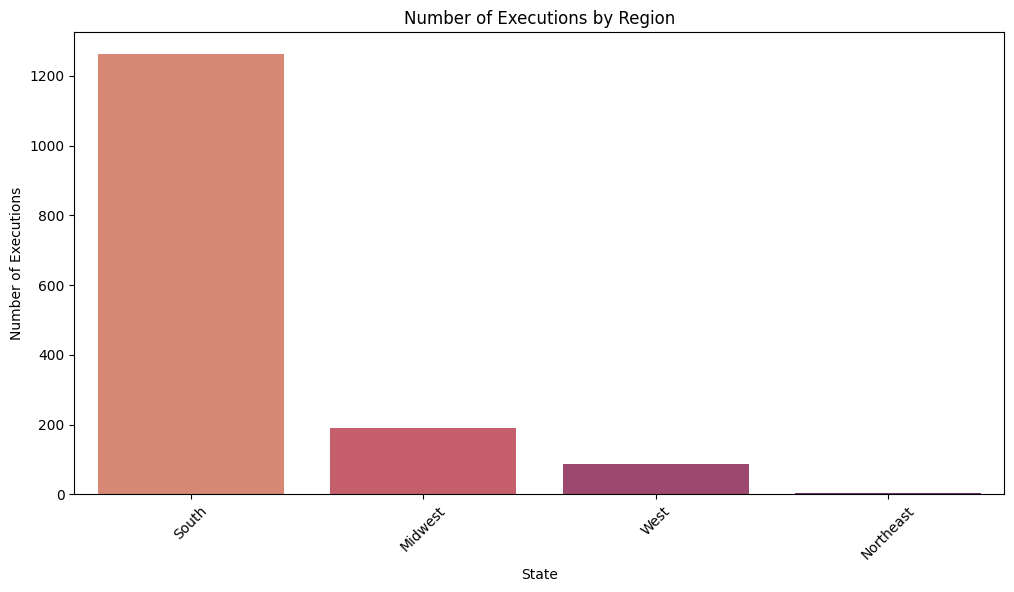

In [52]:
plt.figure(figsize=(12, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, hue=region_counts.index, palette='flare')
plt.title('Number of Executions by Region')
plt.xlabel('State')
plt.ylabel('Number of Executions')
plt.xticks(rotation=45)
plt.show()

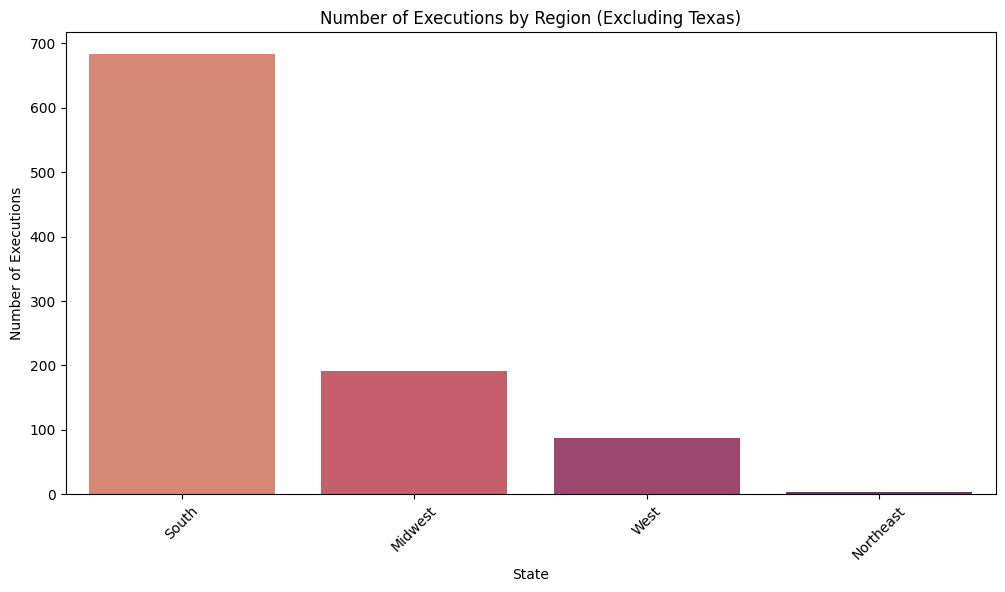

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(x=region_counts_texas_removed.index, y=region_counts_texas_removed.values, hue=region_counts_texas_removed.index, palette='flare')
plt.title('Number of Executions by Region (Excluding Texas)')
plt.xlabel('State')
plt.ylabel('Number of Executions')
plt.xticks(rotation=45)
plt.show()

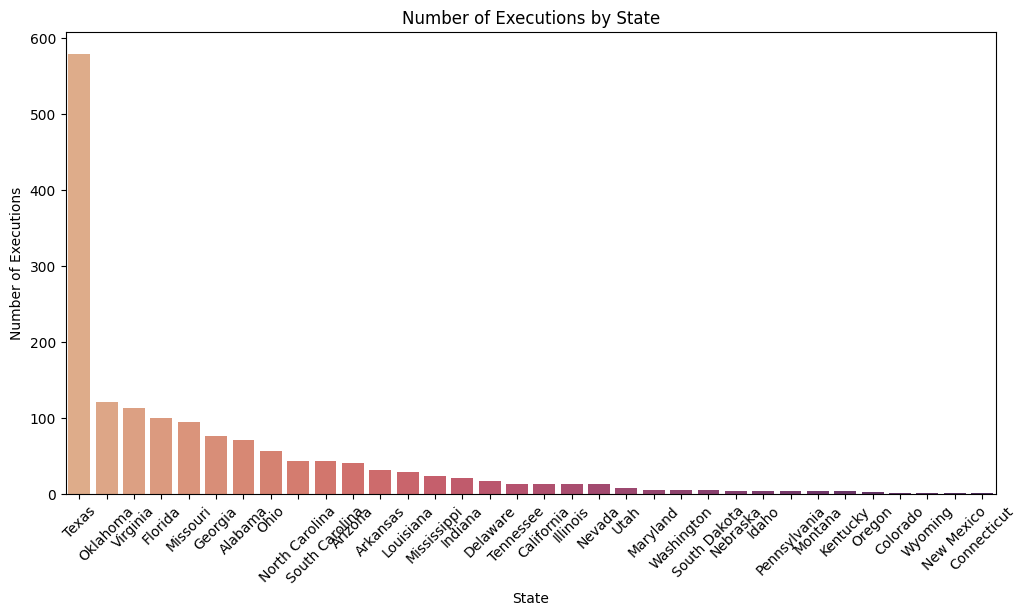

In [54]:
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, hue=state_counts.index, palette='flare')
plt.title('Number of Executions by State')
plt.xlabel('State')
plt.ylabel('Number of Executions')
plt.xticks(rotation=45)
plt.show()

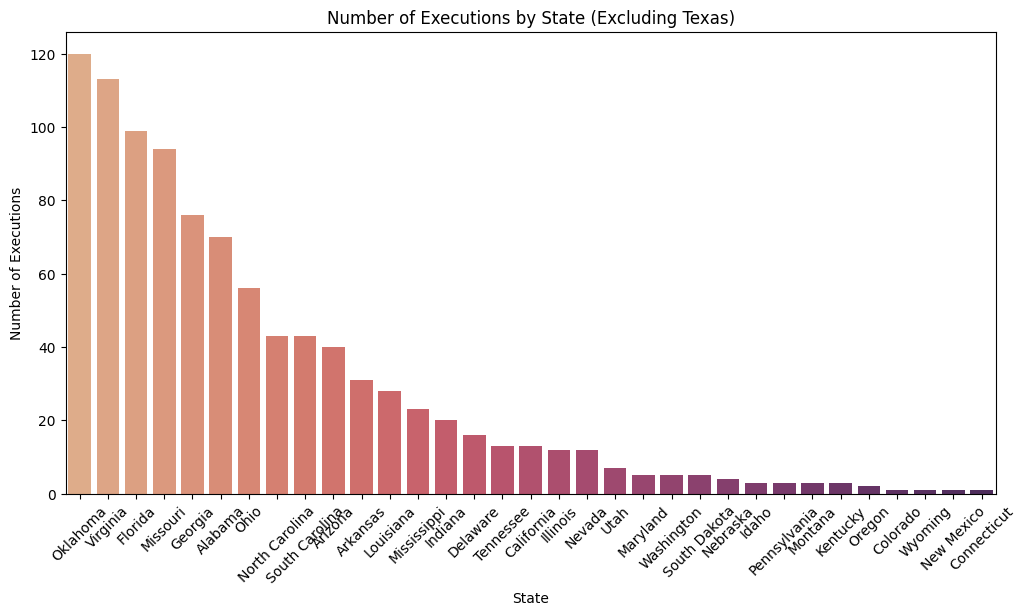

In [55]:
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts_texas_removed.index, y=state_counts_texas_removed.values, hue=state_counts_texas_removed.index, palette='flare')
plt.title('Number of Executions by State (Excluding Texas)')
plt.xlabel('State')
plt.ylabel('Number of Executions')
plt.xticks(rotation=45)
plt.show()

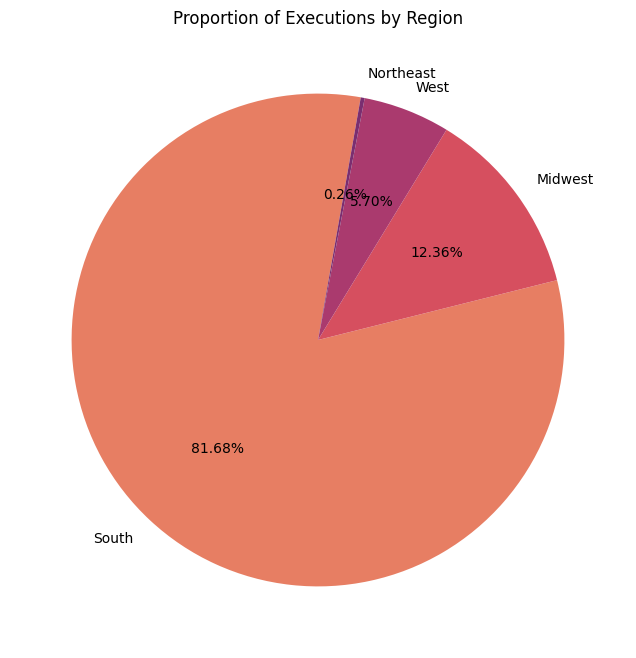

In [56]:
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.2f%%', startangle=80, colors=sns.color_palette('flare', len(region_counts)))
plt.title('Proportion of Executions by Region')
plt.show()

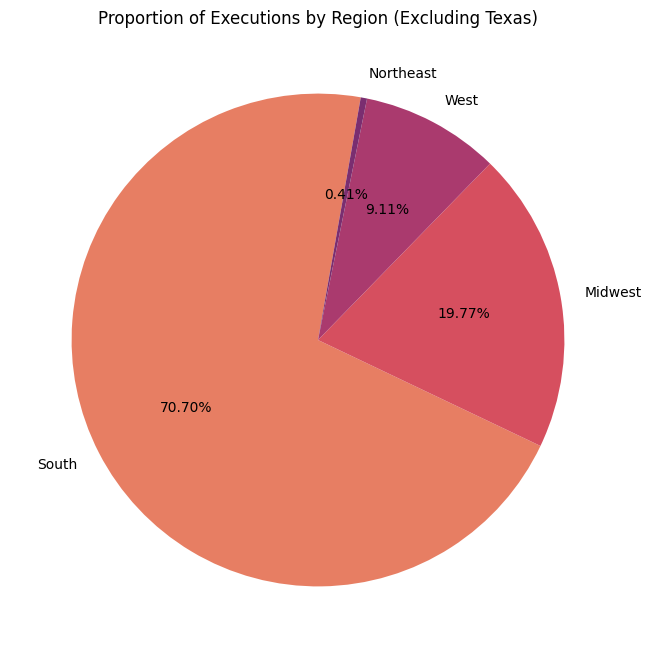

In [57]:
plt.figure(figsize=(8, 8))
plt.pie(region_counts_texas_removed, labels=region_counts_texas_removed.index, autopct='%1.2f%%', startangle=80, colors=sns.color_palette('flare', len(region_counts)))
plt.title('Proportion of Executions by Region (Excluding Texas)')
plt.show()

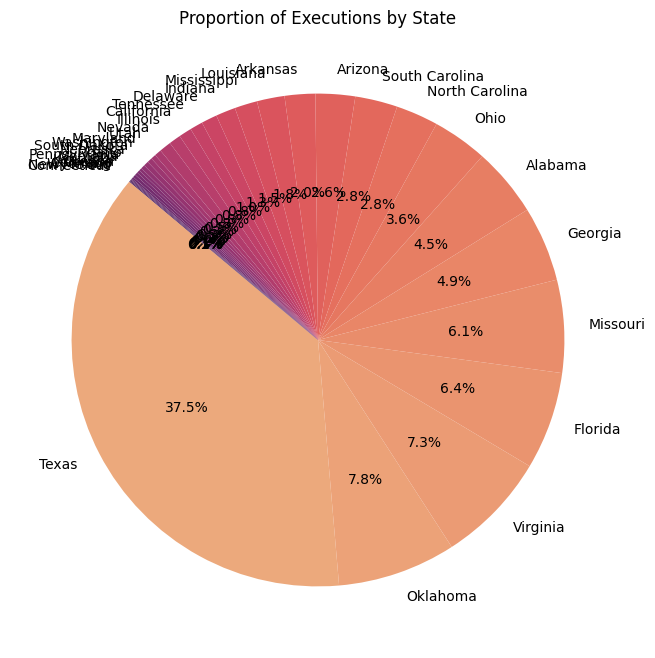

In [58]:
plt.figure(figsize=(8, 8))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('flare', len(state_counts)))
plt.title('Proportion of Executions by State')
plt.show()

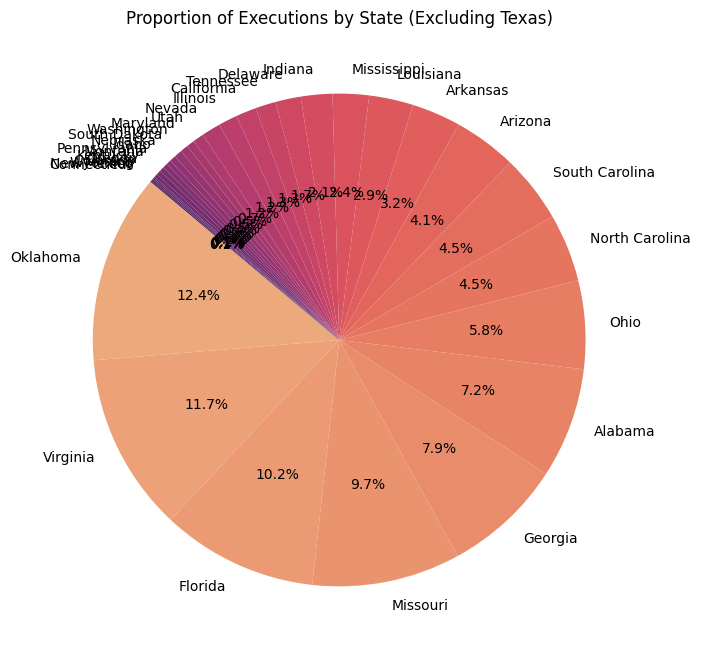

In [59]:
plt.figure(figsize=(8, 8))
plt.pie(state_counts_texas_removed, labels=state_counts_texas_removed.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('flare', len(state_counts_texas_removed)))
plt.title('Proportion of Executions by State (Excluding Texas)')
plt.show()

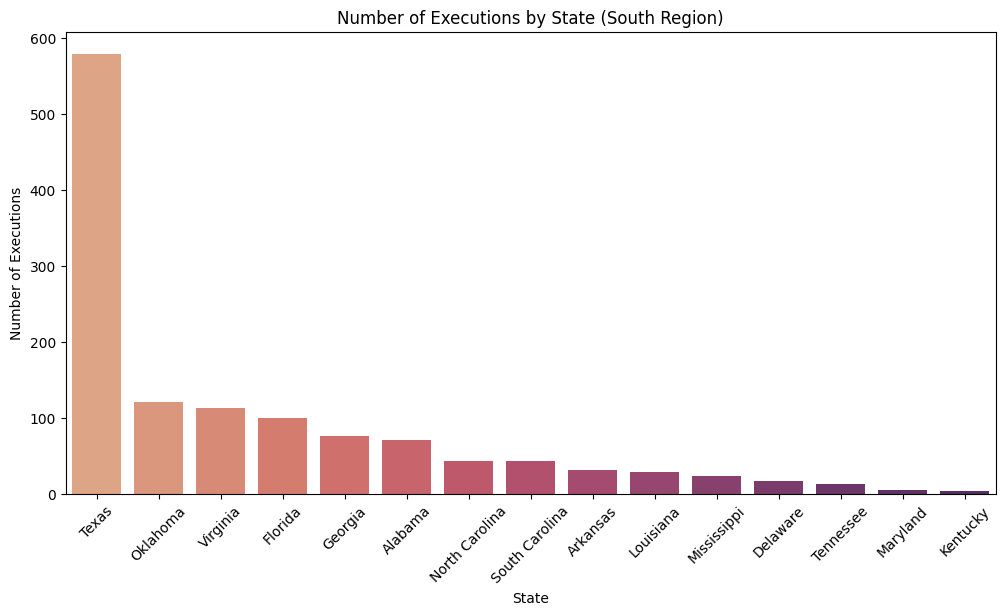

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(x=south_counts.index, y=south_counts.values, hue=south_counts.index, palette='flare')
plt.title('Number of Executions by State (South Region)')
plt.xlabel('State')
plt.ylabel('Number of Executions')
plt.xticks(rotation=45)
plt.show()

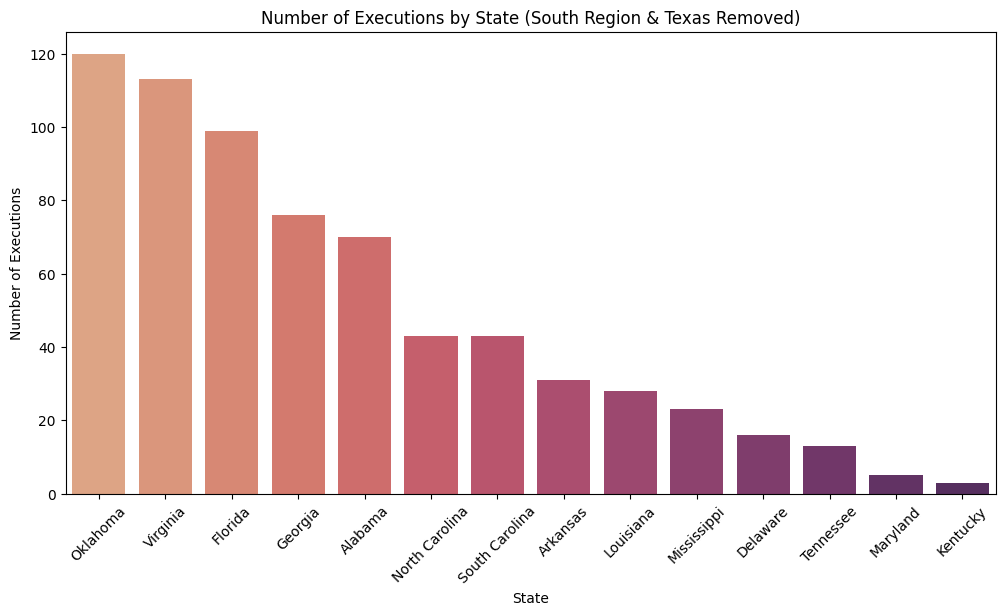

In [63]:
plt.figure(figsize=(12, 6))
sns.barplot(x=south_counts_texas_removed.index, y=south_counts_texas_removed.values, hue=south_counts_texas_removed.index, palette='flare')
plt.title('Number of Executions by State (South Region & Texas Removed)')
plt.xlabel('State')
plt.ylabel('Number of Executions')
plt.xticks(rotation=45)
plt.show()

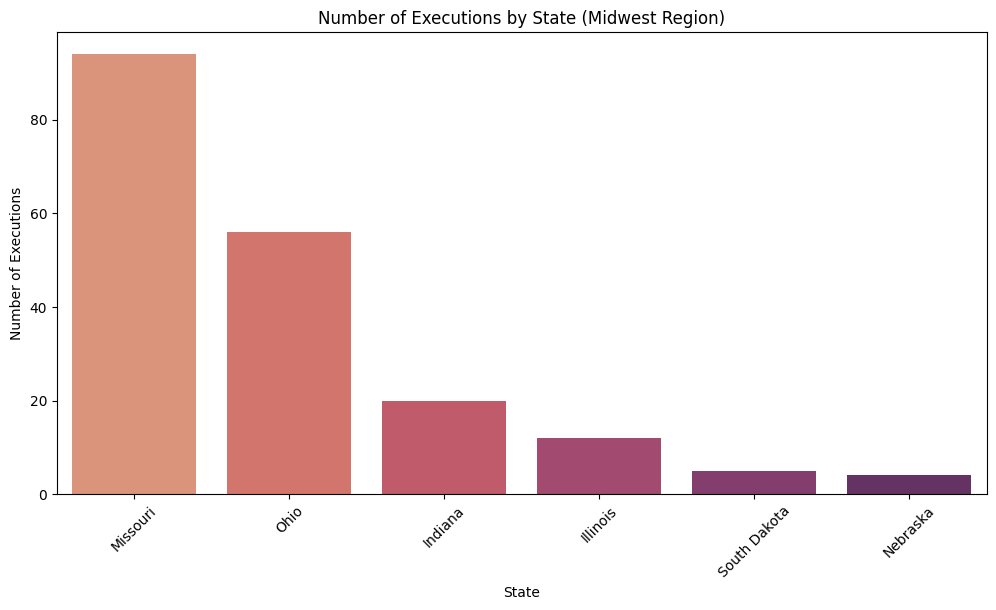

In [64]:
plt.figure(figsize=(12, 6))
sns.barplot(x=midwest_counts.index, y=midwest_counts.values, hue=midwest_counts.index, palette='flare')
plt.title('Number of Executions by State (Midwest Region)')
plt.xlabel('State')
plt.ylabel('Number of Executions')
plt.xticks(rotation=45)
plt.show()

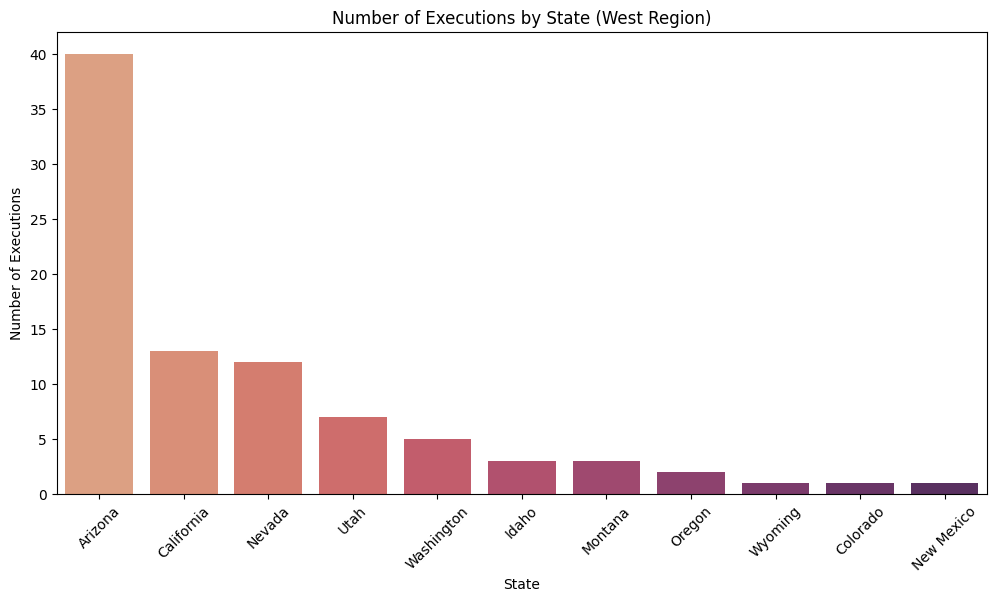

In [65]:
plt.figure(figsize=(12, 6))
sns.barplot(x=west_counts.index, y=west_counts.values, hue=west_counts.index, palette='flare')
plt.title('Number of Executions by State (West Region)')
plt.xlabel('State')
plt.ylabel('Number of Executions')
plt.xticks(rotation=45)
plt.show()

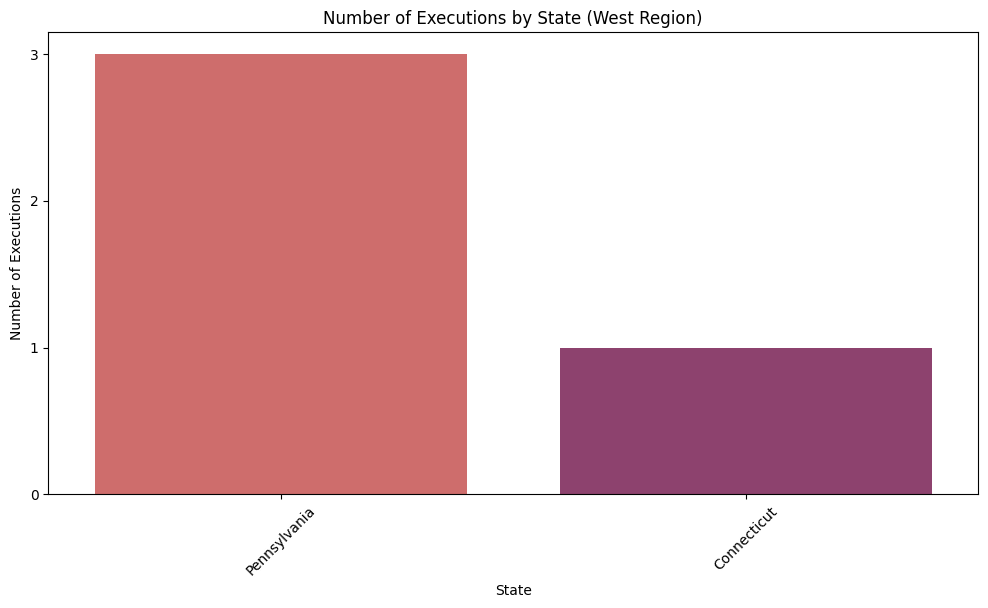

In [71]:
plt.figure(figsize=(12, 6))
sns.barplot(x=northeast_counts.index, y=northeast_counts.values, hue=northeast_counts.index, palette='flare')
plt.title('Number of Executions by State (West Region)')
plt.xlabel('State')
plt.ylabel('Number of Executions')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 4, 1))
plt.show()

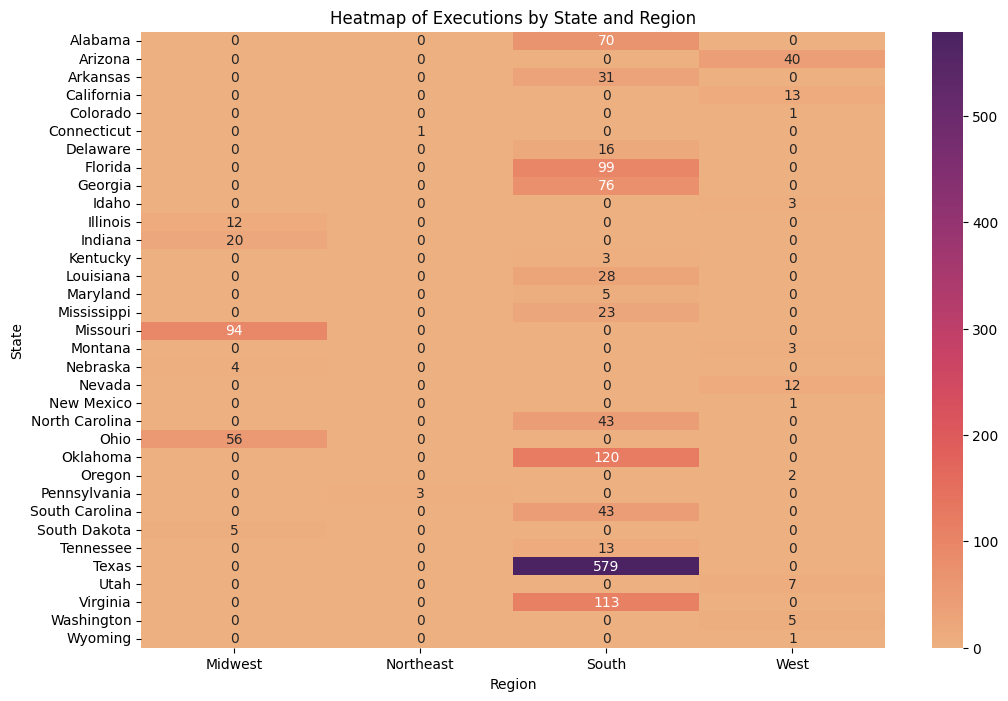

In [ ]:
state_region_counts = pd.crosstab(df['State'], df['Region'])

plt.figure(figsize=(12, 8))
sns.heatmap(state_region_counts, cmap='flare', annot=True, fmt='d')
plt.title('Heatmap of Executions by State and Region')
plt.xlabel('Region')
plt.ylabel('State')
plt.show()

In [8]:
region_encoder = LabelEncoder()
state_encoder = LabelEncoder()

df['Region_encoded'] = region_encoder.fit_transform(df['Region'])
df['State_encoded'] = state_encoder.fit_transform(df['State'])

X = df[['Region_encoded']]
y = df['State_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=23)

logistic_model_ovr = OneVsRestClassifier(LogisticRegression(class_weight='balanced', random_state=23))
logistic_model_ovr.fit(X_train, y_train)

tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=23)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=23)


Logistic Regression: One vs Rest - Evaluation Metrics:

Accuracy: 0.42
Precision: 0.78
Recall: 0.42
F1 Score: 0.27
ROC AUC Score: 0.58

Confusion Matrix:



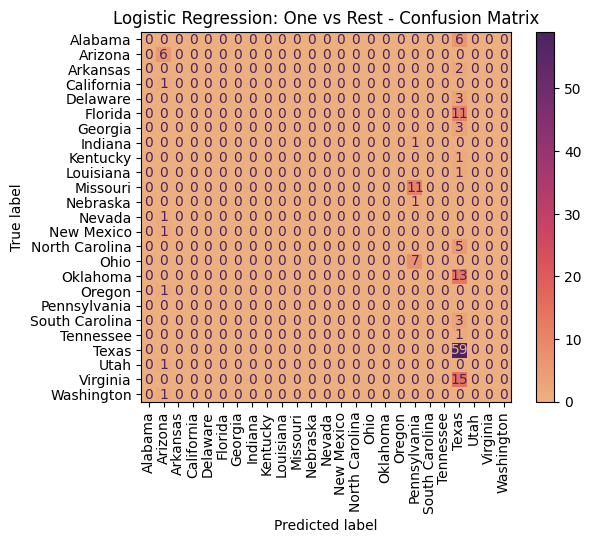


Predicted States: ['Arizona' 'Pennsylvania' 'Texas']

Actual States: ['Alabama' 'Arizona' 'Arkansas' 'California' 'Delaware' 'Florida'
 'Georgia' 'Indiana' 'Kentucky' 'Louisiana' 'Missouri' 'Nebraska' 'Nevada'
 'New Mexico' 'North Carolina' 'Ohio' 'Oklahoma' 'Oregon' 'South Carolina'
 'Tennessee' 'Texas' 'Utah' 'Virginia' 'Washington']




Decision Tree - Evaluation Metrics:

Accuracy: 0.42
Precision: 0.78
Recall: 0.42
F1 Score: 0.27
ROC AUC Score: 0.53

Confusion Matrix:



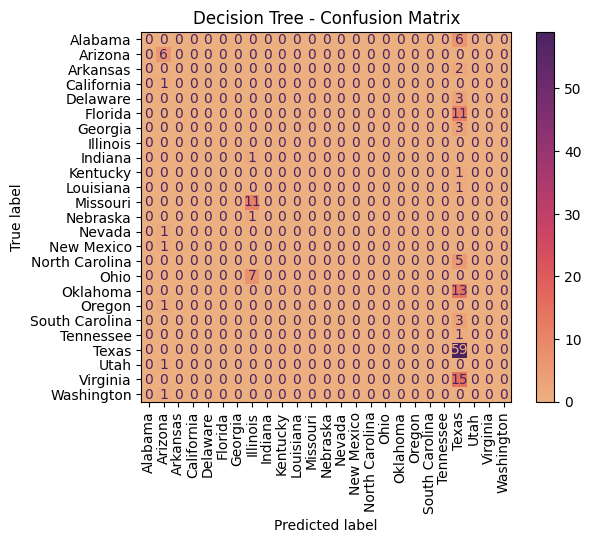


Predicted States: ['Arizona' 'Illinois' 'Texas']

Actual States: ['Alabama' 'Arizona' 'Arkansas' 'California' 'Delaware' 'Florida'
 'Georgia' 'Indiana' 'Kentucky' 'Louisiana' 'Missouri' 'Nebraska' 'Nevada'
 'New Mexico' 'North Carolina' 'Ohio' 'Oklahoma' 'Oregon' 'South Carolina'
 'Tennessee' 'Texas' 'Utah' 'Virginia' 'Washington']





In [73]:
y_pred_logistic_ovr = logistic_model_ovr.predict(X_test)
y_pred_tree = tree_model.predict(X_test)
y_pred_logistic_ovr_prob = logistic_model_ovr.predict_proba(X_test)
y_pred_tree_prob = tree_model.predict_proba(X_test)

def evaluate_model(y_true, y_pred, y_pred_prob, model, model_name="Model"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted')

    model_classes = state_encoder.classes_
    y_true_decoded = state_encoder.inverse_transform(y_true)
    valid_indices = [i for i, cls in enumerate(model_classes) if cls in np.unique(y_true_decoded)]
    y_pred_prob_filtered = y_pred_prob[:, valid_indices]
    y_pred_prob_filtered = y_pred_prob_filtered / y_pred_prob_filtered.sum(axis=1, keepdims=True)
    roc_auc = roc_auc_score(y_true_decoded, y_pred_prob_filtered, multi_class='ovr', average='weighted')

    print(f"\n{model_name} - Evaluation Metrics:\n")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC Score: {roc_auc:.2f}")
    print("\nConfusion Matrix:\n")

    cm = confusion_matrix(y_true, y_pred)
    unique_labels = np.unique(np.concatenate([y_true, y_pred]))
    display_labels = state_encoder.inverse_transform(unique_labels)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    cm_display.plot(cmap='flare', xticks_rotation='vertical')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    predicted_states = state_encoder.inverse_transform(y_pred)
    print(f"\nPredicted States: {np.unique(predicted_states)}")

    actual_states = state_encoder.inverse_transform(y_true)
    print(f"\nActual States: {np.unique(actual_states)}\n\n\n")

evaluate_model(y_test, y_pred_logistic_ovr, y_pred_logistic_ovr_prob, logistic_model_ovr, model_name="Logistic Regression: One vs Rest")
evaluate_model(y_test, y_pred_tree, y_pred_tree_prob, tree_model, model_name="Decision Tree")